In [24]:
import numpy as np
from numpy.random import randn
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, LabelEncoder

# 加载真实的Iris数据集
iris = load_iris()
X = iris.data  # 特征数据 (150, 4)
y = iris.target  # 标签数据 (150,)

# 数据标准化
scaler = StandardScaler()     #均值为0，方差为1，在[-3sigma, +3sigma]之间
X = scaler.fit_transform(X)


# 将标签转换为one-hot编码
def to_onehot(y, num_classes):
    onehot = np.zeros((len(y), num_classes))
    onehot[np.arange(len(y)), y] = 1
    #print(onehot)
    return onehot



y_onehot = to_onehot(y, 3)  # 3个类别

# 设置网络参数
N, D_in, H, D_out = 150, 4, 20, 3  # 150条数据，4个特征，隐层20个神经元，输出3类

# 使用真实数据
x, y_true = X, y_onehot

print("特征数据形状:", x.shape)
print("标签数据形状:", y_true.shape)

# 初始化权重
w1, w2 = randn(D_in, H), randn(H, D_out)
print("w1权重形状:", w1.shape)
print("w2权重形状:", w2.shape)

# 训练过程
lsloss = []
accuracies = []

for t in range(500):  # 增加训练轮数
    # 前向传播
    
    h = 1 / (1 + np.exp(-x.dot(w1)))  # sigmoid激活
    y_pred = h.dot(w2)
    
    # 计算损失
    loss = np.square(y_pred - y_true).sum()
    lsloss.append(loss)
    
    # 计算准确率
    pred_classes = np.argmax(y_pred, axis=1)
    true_classes = np.argmax(y_true, axis=1)
    accuracy = np.mean(pred_classes == true_classes)
    accuracies.append(accuracy)
    
    # 反向传播
    grad_y_pred = 2.0 * (y_pred - y_true)
    grad_w2 = h.T.dot(grad_y_pred)
    grad_h = grad_y_pred.dot(w2.T)
    grad_w1 = x.T.dot(grad_h * h * (1 - h))
    
    # 更新权重
    w1 -= 1e-2 * grad_w1  # 调整学习率
    w2 -= 1e-2 * grad_w2
    
    if t % 100 == 0:
        print(f"Iteration {t}: Loss = {loss:.4f}, Accuracy = {accuracy:.4f}")


特征数据形状: (150, 4)
标签数据形状: (150, 3)
w1权重形状: (4, 20)
w2权重形状: (20, 3)
Iteration 0: Loss = 3676.2753, Accuracy = 0.5400
Iteration 100: Loss = 20972434126653980213785855360877225433033849864163987800580425266510112720846497292160379246286937246525451981708197197774537076869672448619512319638237107012784917132095401043408126085595298386545836128118687442266464142698906614144186712064.0000, Accuracy = 0.3333
Iteration 200: Loss = nan, Accuracy = 0.3333
Iteration 300: Loss = nan, Accuracy = 0.3333
Iteration 400: Loss = nan, Accuracy = 0.3333


/tmp/ipykernel_2144/177489613.py:49: RuntimeWarning: overflow encountered in exp
  h = 1 / (1 + np.exp(-x.dot(w1)))  # sigmoid激活
/tmp/ipykernel_2144/177489613.py:53: RuntimeWarning: overflow encountered in square
  loss = np.square(y_pred - y_true).sum()
/root/miniconda3/lib/python3.8/site-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/tmp/ipykernel_2144/177489613.py:66: RuntimeWarning: invalid value encountered in multiply
  grad_w1 = x.T.dot(grad_h * h * (1 - h))


特征数据形状: (150, 4)
标签数据形状: (150, 3)
w1权重形状: (4, 20)
w2权重形状: (20, 3)
Iteration 0: Loss = 1.6896, Accuracy = 0.3333
Iteration 50: Loss = 0.6435, Accuracy = 0.8333
Iteration 100: Loss = 0.4659, Accuracy = 0.8667
Iteration 150: Loss = 0.3879, Accuracy = 0.8933
Iteration 200: Loss = 0.3406, Accuracy = 0.9000
Iteration 250: Loss = 0.3069, Accuracy = 0.9267
Iteration 300: Loss = 0.2806, Accuracy = 0.9333
Iteration 350: Loss = 0.2590, Accuracy = 0.9333
Iteration 400: Loss = 0.2407, Accuracy = 0.9400
Iteration 450: Loss = 0.2249, Accuracy = 0.9467


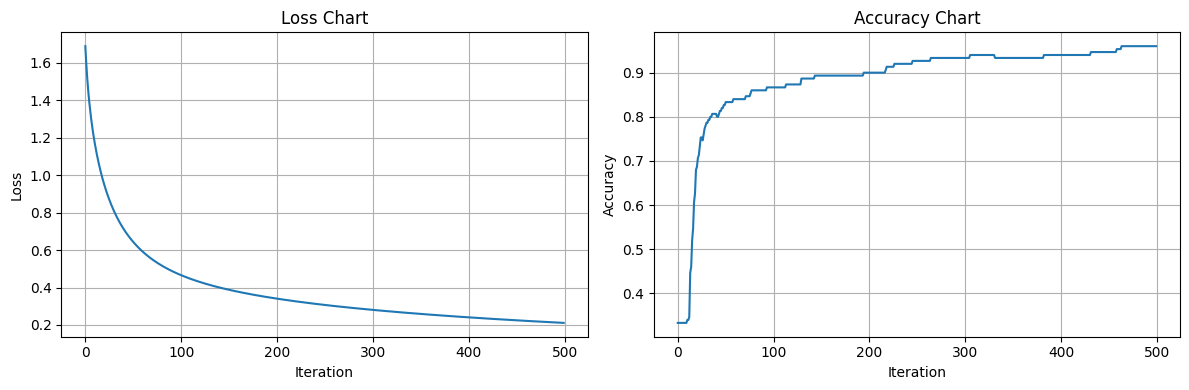


最终准确率: 0.9600


In [26]:
import numpy as np
from numpy.random import randn
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# 加载真实的Iris数据集
iris = load_iris()
X = iris.data
y = iris.target

# 数据标准化
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 将标签转换为one-hot编码
def to_onehot(y, num_classes):
    onehot = np.zeros((len(y), num_classes))
    onehot[np.arange(len(y)), y] = 1
    return onehot

y_onehot = to_onehot(y, 3)

# 设置网络参数
N, D_in, H, D_out = 150, 4, 20, 3

# 使用真实数据
x, y_true = X, y_onehot

print("特征数据形状:", x.shape)
print("标签数据形状:", y_true.shape)

# 改进的权重初始化 - 使用Xavier初始化
def xavier_init(n_in, n_out):
    return np.random.randn(n_in, n_out) * np.sqrt(2.0 / (n_in + n_out))

w1 = xavier_init(D_in, H)
w2 = xavier_init(H, D_out)
print("w1权重形状:", w1.shape)
print("w2权重形状:", w2.shape)

# 训练过程
lsloss = []
accuracies = []

for t in range(500):
    # 前向传播
    z1 = x.dot(w1)
    h = 1 / (1 + np.exp(-z1))  # sigmoid激活
    y_pred = h.dot(w2)
    
    # 计算损失 - 使用交叉熵损失（更稳定）
    # 添加softmax确保数值稳定性
    y_pred_softmax = np.exp(y_pred - np.max(y_pred, axis=1, keepdims=True))
    y_pred_softmax = y_pred_softmax / np.sum(y_pred_softmax, axis=1, keepdims=True)
    
    # 交叉熵损失
    loss = -np.sum(y_true * np.log(y_pred_softmax + 1e-8)) / N
    lsloss.append(loss)
    
    # 计算准确率
    pred_classes = np.argmax(y_pred, axis=1)
    true_classes = y  # 直接使用原始标签
    accuracy = np.mean(pred_classes == true_classes)
    accuracies.append(accuracy)
    
    # 反向传播 - 使用交叉熵的梯度
    grad_y_pred = (y_pred_softmax - y_true) / N  # 交叉熵梯度
    
    grad_w2 = h.T.dot(grad_y_pred)
    grad_h = grad_y_pred.dot(w2.T)
    grad_w1 = x.T.dot(grad_h * h * (1 - h))
    
    # 梯度裁剪 - 防止梯度爆炸
    clip_value = 1.0
    grad_w1 = np.clip(grad_w1, -clip_value, clip_value)
    grad_w2 = np.clip(grad_w2, -clip_value, clip_value)
    
    # 使用更小的学习率
    w1 -= 1e-1 * grad_w1  # 调整学习率
    w2 -= 1e-1 * grad_w2
    
    if t % 50 == 0:
        print(f"Iteration {t}: Loss = {loss:.4f}, Accuracy = {accuracy:.4f}")

# 绘制结果
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(lsloss)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss Chart')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(accuracies)
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Accuracy Chart')
plt.grid(True)

plt.tight_layout()
plt.show()

# 最终评估
final_pred = np.argmax(y_pred, axis=1)
final_accuracy = np.mean(final_pred == y)
print(f"\n最终准确率: {final_accuracy:.4f}")